In [13]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [14]:
#path = '../../output/weights/current-best-v3-maybe/log.json'
path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

176001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])
176001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [15]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [16]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

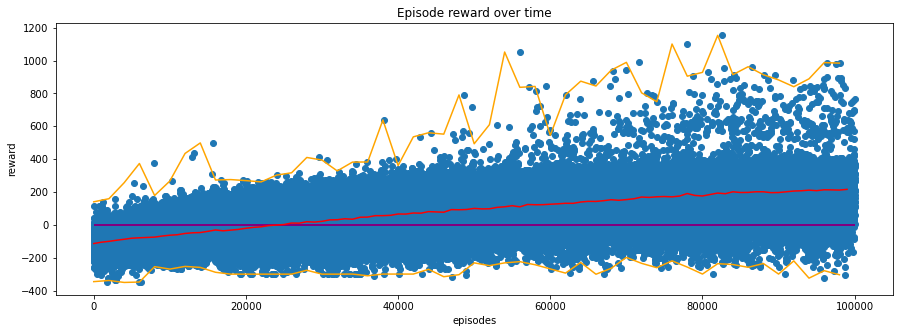

Maximum: 1153.1999999999998
Average: 81.54235499999966
Moving Average (simple): {0: -113.3, 1000: -105.2, 2000: -100.0, 3000: -93.2, 4000: -87.4, 5000: -80.8, 6000: -78.3, 7000: -76.3, 8000: -74.2, 9000: -67.6, 10000: -62.7, 11000: -59.7, 12000: -52.0, 13000: -47.9, 14000: -46.4, 15000: -39.1, 16000: -30.9, 17000: -35.8, 18000: -31.7, 19000: -27.4, 20000: -20.4, 21000: -15.0, 22000: -11.4, 23000: -4.1, 24000: -0.9, 25000: 2.4, 26000: 11.4, 27000: 10.6, 28000: 19.4, 29000: 17.2, 30000: 21.8, 31000: 30.5, 32000: 31.5, 33000: 37.6, 34000: 34.5, 35000: 46.6, 36000: 47.7, 37000: 56.3, 38000: 56.3, 39000: 58.3, 40000: 66.5, 41000: 65.8, 42000: 72.5, 43000: 71.4, 44000: 80.9, 45000: 79.1, 46000: 77.2, 47000: 93.1, 48000: 92.1, 49000: 93.8, 50000: 100.4, 51000: 97.4, 52000: 98.1, 53000: 106.7, 54000: 110.3, 55000: 116.8, 56000: 109.9, 57000: 124.3, 58000: 122.7, 59000: 123.1, 60000: 125.8, 61000: 128.3, 62000: 131.5, 63000: 131.3, 64000: 139.3, 65000: 143.4, 66000: 142.7, 67000: 147.4, 68000: 

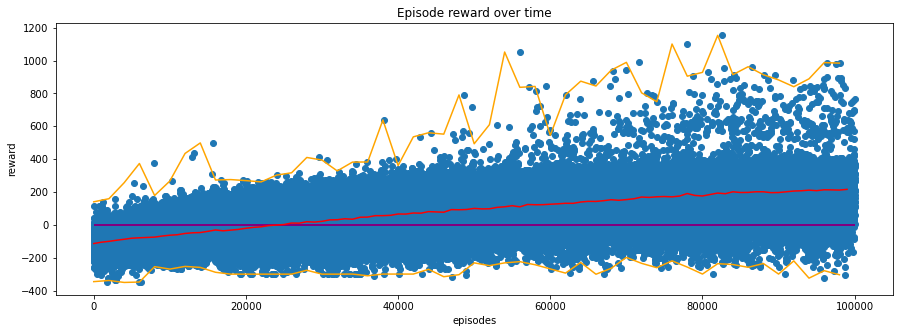

Maximum: 1153.1999999999998
Average: 81.54235499999966
Moving Average (simple): {0: -113.3, 1000: -105.2, 2000: -100.0, 3000: -93.2, 4000: -87.4, 5000: -80.8, 6000: -78.3, 7000: -76.3, 8000: -74.2, 9000: -67.6, 10000: -62.7, 11000: -59.7, 12000: -52.0, 13000: -47.9, 14000: -46.4, 15000: -39.1, 16000: -30.9, 17000: -35.8, 18000: -31.7, 19000: -27.4, 20000: -20.4, 21000: -15.0, 22000: -11.4, 23000: -4.1, 24000: -0.9, 25000: 2.4, 26000: 11.4, 27000: 10.6, 28000: 19.4, 29000: 17.2, 30000: 21.8, 31000: 30.5, 32000: 31.5, 33000: 37.6, 34000: 34.5, 35000: 46.6, 36000: 47.7, 37000: 56.3, 38000: 56.3, 39000: 58.3, 40000: 66.5, 41000: 65.8, 42000: 72.5, 43000: 71.4, 44000: 80.9, 45000: 79.1, 46000: 77.2, 47000: 93.1, 48000: 92.1, 49000: 93.8, 50000: 100.4, 51000: 97.4, 52000: 98.1, 53000: 106.7, 54000: 110.3, 55000: 116.8, 56000: 109.9, 57000: 124.3, 58000: 122.7, 59000: 123.1, 60000: 125.8, 61000: 128.3, 62000: 131.5, 63000: 131.3, 64000: 139.3, 65000: 143.4, 66000: 142.7, 67000: 147.4, 68000: 

In [17]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

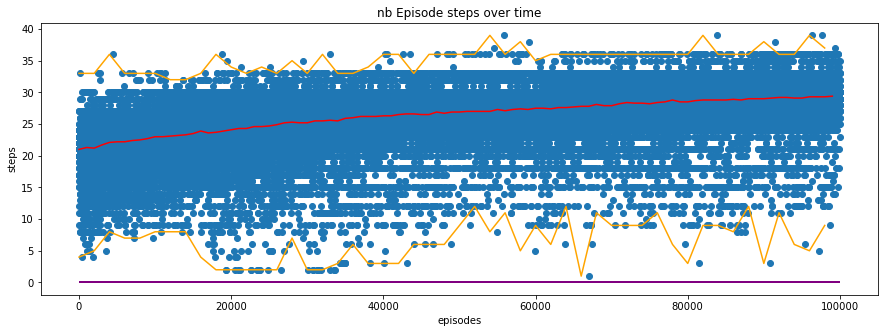

Maximum: 39
Average: 26.36152
Moving Average (simple): {0: 21.0, 1000: 21.3, 2000: 21.2, 3000: 21.7, 4000: 22.1, 5000: 22.2, 6000: 22.2, 7000: 22.4, 8000: 22.5, 9000: 22.7, 10000: 23.0, 11000: 23.0, 12000: 23.1, 13000: 23.2, 14000: 23.3, 15000: 23.5, 16000: 23.9, 17000: 23.6, 18000: 23.7, 19000: 23.9, 20000: 24.1, 21000: 24.3, 22000: 24.3, 23000: 24.6, 24000: 24.6, 25000: 24.7, 26000: 24.9, 27000: 25.2, 28000: 25.3, 29000: 25.2, 30000: 25.2, 31000: 25.5, 32000: 25.5, 33000: 25.6, 34000: 25.5, 35000: 25.9, 36000: 26.0, 37000: 26.2, 38000: 26.2, 39000: 26.2, 40000: 26.3, 41000: 26.3, 42000: 26.5, 43000: 26.6, 44000: 26.6, 45000: 26.5, 46000: 26.5, 47000: 26.9, 48000: 26.7, 49000: 26.9, 50000: 26.9, 51000: 27.0, 52000: 27.0, 53000: 27.0, 54000: 27.0, 55000: 27.3, 56000: 27.1, 57000: 27.3, 58000: 27.4, 59000: 27.3, 60000: 27.5, 61000: 27.5, 62000: 27.4, 63000: 27.6, 64000: 27.6, 65000: 27.7, 66000: 27.8, 67000: 27.8, 68000: 28.1, 69000: 27.9, 70000: 27.9, 71000: 28.2, 72000: 28.4, 73000: 2

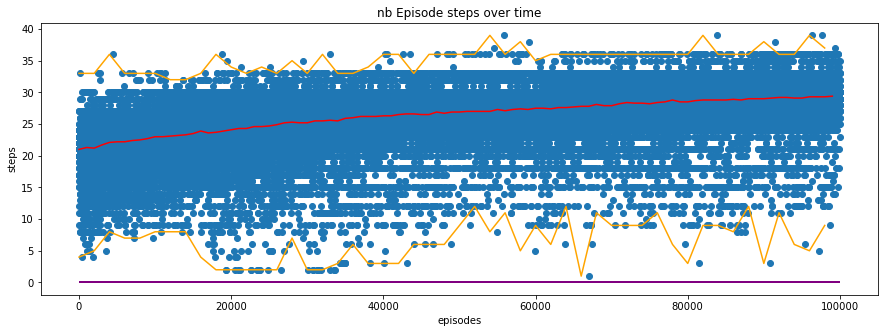

Maximum: 39
Average: 26.36152
Moving Average (simple): {0: 21.0, 1000: 21.3, 2000: 21.2, 3000: 21.7, 4000: 22.1, 5000: 22.2, 6000: 22.2, 7000: 22.4, 8000: 22.5, 9000: 22.7, 10000: 23.0, 11000: 23.0, 12000: 23.1, 13000: 23.2, 14000: 23.3, 15000: 23.5, 16000: 23.9, 17000: 23.6, 18000: 23.7, 19000: 23.9, 20000: 24.1, 21000: 24.3, 22000: 24.3, 23000: 24.6, 24000: 24.6, 25000: 24.7, 26000: 24.9, 27000: 25.2, 28000: 25.3, 29000: 25.2, 30000: 25.2, 31000: 25.5, 32000: 25.5, 33000: 25.6, 34000: 25.5, 35000: 25.9, 36000: 26.0, 37000: 26.2, 38000: 26.2, 39000: 26.2, 40000: 26.3, 41000: 26.3, 42000: 26.5, 43000: 26.6, 44000: 26.6, 45000: 26.5, 46000: 26.5, 47000: 26.9, 48000: 26.7, 49000: 26.9, 50000: 26.9, 51000: 27.0, 52000: 27.0, 53000: 27.0, 54000: 27.0, 55000: 27.3, 56000: 27.1, 57000: 27.3, 58000: 27.4, 59000: 27.3, 60000: 27.5, 61000: 27.5, 62000: 27.4, 63000: 27.6, 64000: 27.6, 65000: 27.7, 66000: 27.8, 67000: 27.8, 68000: 28.1, 69000: 27.9, 70000: 27.9, 71000: 28.2, 72000: 28.4, 73000: 2

In [18]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

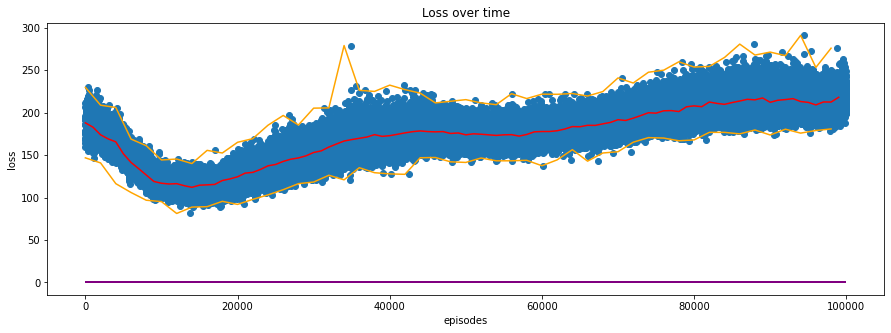

Maximum: 290.9050598144531
Average: 173.1061165562439
Moving Average (simple): {0: 187.9, 1000: 182.8, 2000: 173.8, 3000: 169.0, 4000: 165.5, 5000: 151.4, 6000: 141.3, 7000: 134.0, 8000: 126.5, 9000: 118.9, 10000: 116.8, 11000: 115.9, 12000: 116.3, 13000: 113.9, 14000: 112.0, 15000: 114.5, 16000: 114.9, 17000: 115.4, 18000: 120.0, 19000: 121.9, 20000: 124.4, 21000: 128.7, 22000: 129.6, 23000: 133.0, 24000: 137.3, 25000: 138.9, 26000: 142.5, 27000: 145.1, 28000: 146.6, 29000: 149.1, 30000: 153.0, 31000: 154.9, 32000: 159.4, 33000: 163.0, 34000: 166.5, 35000: 168.2, 36000: 169.7, 37000: 171.2, 38000: 174.0, 39000: 172.0, 40000: 172.8, 41000: 174.4, 42000: 176.1, 43000: 177.5, 44000: 178.4, 45000: 177.6, 46000: 177.3, 47000: 177.6, 48000: 175.4, 49000: 176.0, 50000: 173.8, 51000: 175.0, 52000: 174.5, 53000: 173.8, 54000: 173.1, 55000: 173.8, 56000: 174.0, 57000: 172.3, 58000: 174.2, 59000: 177.3, 60000: 177.7, 61000: 177.7, 62000: 178.6, 63000: 180.6, 64000: 183.5, 65000: 183.3, 66000: 18

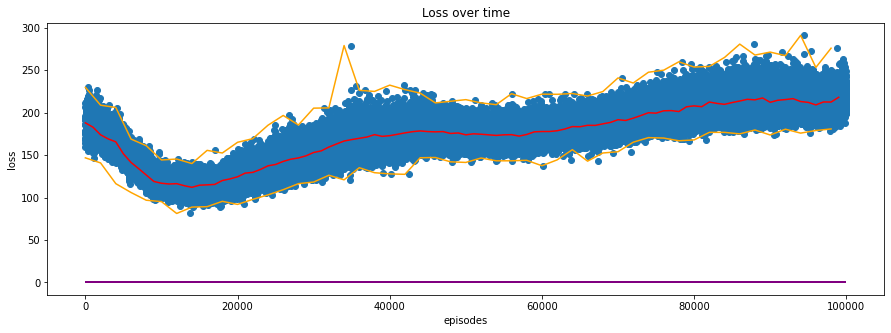

Maximum: 290.9050598144531
Average: 173.1061165562439
Moving Average (simple): {0: 187.9, 1000: 182.8, 2000: 173.8, 3000: 169.0, 4000: 165.5, 5000: 151.4, 6000: 141.3, 7000: 134.0, 8000: 126.5, 9000: 118.9, 10000: 116.8, 11000: 115.9, 12000: 116.3, 13000: 113.9, 14000: 112.0, 15000: 114.5, 16000: 114.9, 17000: 115.4, 18000: 120.0, 19000: 121.9, 20000: 124.4, 21000: 128.7, 22000: 129.6, 23000: 133.0, 24000: 137.3, 25000: 138.9, 26000: 142.5, 27000: 145.1, 28000: 146.6, 29000: 149.1, 30000: 153.0, 31000: 154.9, 32000: 159.4, 33000: 163.0, 34000: 166.5, 35000: 168.2, 36000: 169.7, 37000: 171.2, 38000: 174.0, 39000: 172.0, 40000: 172.8, 41000: 174.4, 42000: 176.1, 43000: 177.5, 44000: 178.4, 45000: 177.6, 46000: 177.3, 47000: 177.6, 48000: 175.4, 49000: 176.0, 50000: 173.8, 51000: 175.0, 52000: 174.5, 53000: 173.8, 54000: 173.1, 55000: 173.8, 56000: 174.0, 57000: 172.3, 58000: 174.2, 59000: 177.3, 60000: 177.7, 61000: 177.7, 62000: 178.6, 63000: 180.6, 64000: 183.5, 65000: 183.3, 66000: 18

In [19]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

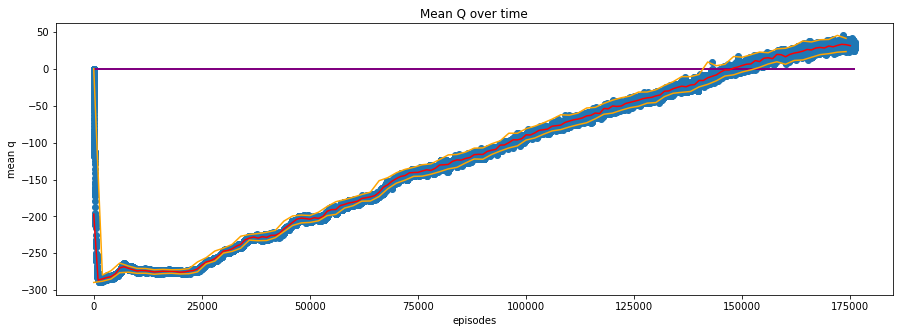

Maximum: 45.54836654663086
Average: -122.7625402225154
Moving Average (simple): {0: -197.0, 1000: -286.4, 2000: -284.8, 3000: -283.0, 4000: -281.7, 5000: -278.0, 6000: -270.0, 7000: -268.2, 8000: -270.4, 9000: -272.2, 10000: -274.0, 11000: -273.3, 12000: -273.7, 13000: -274.4, 14000: -275.4, 15000: -274.9, 16000: -274.4, 17000: -274.6, 18000: -274.5, 19000: -274.9, 20000: -275.7, 21000: -275.3, 22000: -274.1, 23000: -273.6, 24000: -271.1, 25000: -266.2, 26000: -261.9, 27000: -260.3, 28000: -257.4, 29000: -252.9, 30000: -247.0, 31000: -246.3, 32000: -244.0, 33000: -240.4, 34000: -238.0, 35000: -231.9, 36000: -229.4, 37000: -227.9, 38000: -229.5, 39000: -227.5, 40000: -228.5, 41000: -225.7, 42000: -225.7, 43000: -223.0, 44000: -216.9, 45000: -212.5, 46000: -208.2, 47000: -203.7, 48000: -202.3, 49000: -202.9, 50000: -203.8, 51000: -201.8, 52000: -202.7, 53000: -200.2, 54000: -193.0, 55000: -190.8, 56000: -190.7, 57000: -185.4, 58000: -183.7, 59000: -181.8, 60000: -180.8, 61000: -179.4, 62

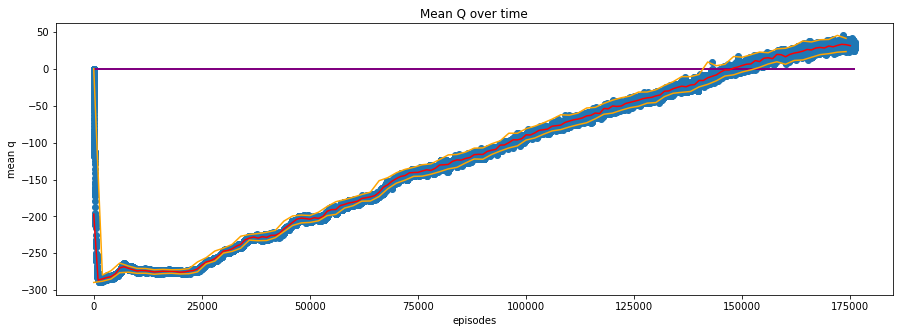

Maximum: 45.54836654663086
Average: -122.7625402225154
Moving Average (simple): {0: -197.0, 1000: -286.4, 2000: -284.8, 3000: -283.0, 4000: -281.7, 5000: -278.0, 6000: -270.0, 7000: -268.2, 8000: -270.4, 9000: -272.2, 10000: -274.0, 11000: -273.3, 12000: -273.7, 13000: -274.4, 14000: -275.4, 15000: -274.9, 16000: -274.4, 17000: -274.6, 18000: -274.5, 19000: -274.9, 20000: -275.7, 21000: -275.3, 22000: -274.1, 23000: -273.6, 24000: -271.1, 25000: -266.2, 26000: -261.9, 27000: -260.3, 28000: -257.4, 29000: -252.9, 30000: -247.0, 31000: -246.3, 32000: -244.0, 33000: -240.4, 34000: -238.0, 35000: -231.9, 36000: -229.4, 37000: -227.9, 38000: -229.5, 39000: -227.5, 40000: -228.5, 41000: -225.7, 42000: -225.7, 43000: -223.0, 44000: -216.9, 45000: -212.5, 46000: -208.2, 47000: -203.7, 48000: -202.3, 49000: -202.9, 50000: -203.8, 51000: -201.8, 52000: -202.7, 53000: -200.2, 54000: -193.0, 55000: -190.8, 56000: -190.7, 57000: -185.4, 58000: -183.7, 59000: -181.8, 60000: -180.8, 61000: -179.4, 62

In [20]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [9]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [12]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")